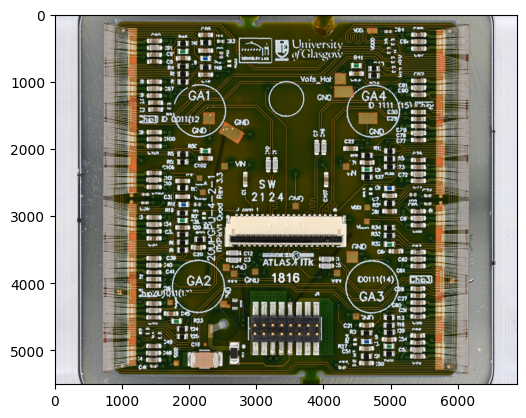

In [1]:
import numpy as np
import matplotlib.pyplot as plt
im = plt.imread('1005_20UPGM23211816_AfterBonding.jpg')
plt.imshow(im)

In [2]:
seuil = 1.7 # norme des vecteur comprises entre 0 et racine de 3
def norme(p):
    return np.sqrt( (p[0]/255)**2 + (p[1]/255)**2 + (p[2]/255)**2 )

def trace(TEST):
    hauteur, largeur = TEST.shape[0], TEST.shape[1]
    L = []
    for i in range(hauteur):
        p = TEST[i,largeur//2,]
        L.append(norme(p))
    return L

def compte(TEST, seuil):
    lastcounted = False
    compteur = 0
    L = trace(TEST)
    for x in L:
        if x > seuil and not lastcounted:
            compteur+=1
            lastcounted = True
        elif x < seuil:
            lastcounted = False
    return compteur

# Comptage à gauche

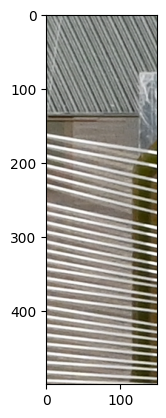

In [3]:
plt.imshow(   np.array([[ im[i,770 + j,].tolist() for j in range(150) ] for i in range(500) ])    ) # idée grossière de l'endroit où on se situe

plage en hauteur où se situent les fils : du pixel 120 au 5320

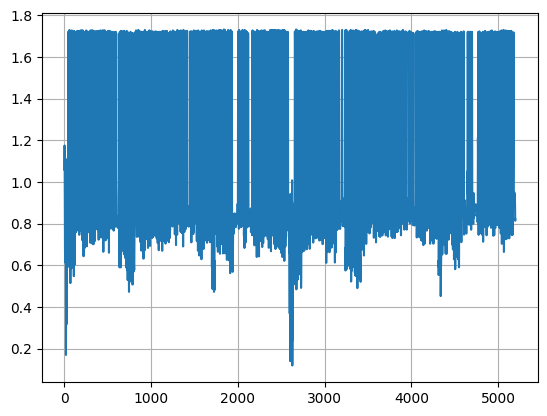

In [4]:
sectionimage = np.array([[ im[i,770 + j,].tolist() for j in range(15) ] for i in range(120,5320) ]) # section sur laquelle on va compter
plt.figure()
plt.grid()
plt.plot(trace(sectionimage))

In [5]:
compte(sectionimage, seuil)

354

Prenons la médiane sur plusieurs colonnes de pixels pour être plus sûr du résultat

In [6]:
sections_gauche = [    np.array([[ im[i,(750 + j) + 5*shift,].tolist() for j in range(15) ] for i in range(120, 5320) ])    for shift in range(5)  ]
L = []
for sec in sections_gauche:
    L.append(compte(sec,seuil))
np.median(L)

np.float64(354.0)

# Comptage à droite

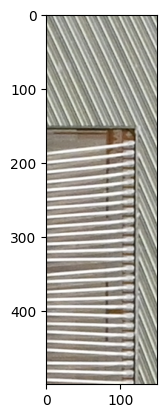

In [7]:
plt.imshow(   np.array([[ im[i,6050 + j,].tolist() for j in range(150) ] for i in range(500) ])    ) # idée grossière de l'endroit où on se situ

plage en hauteur où se situent les fils : du pixel 150 au 5350

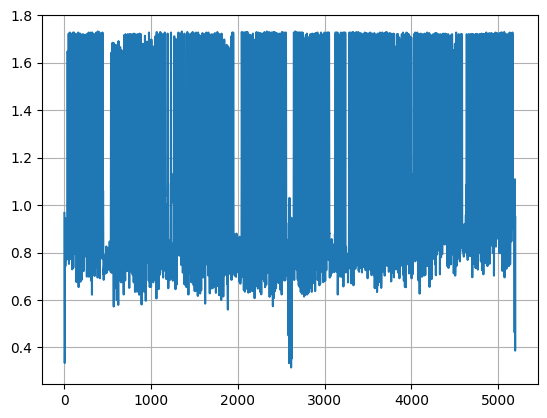

In [8]:
sectionimage = np.array([[ im[i,6050 + j,].tolist() for j in range(15) ] for i in range(150,5350) ]) # section sur laquelle on va compter
plt.figure()
plt.grid()
plt.plot(trace(sectionimage))

In [9]:
sections_droite = [    np.array([[ im[i,(6050 + j) + 10*shift,].tolist() for j in range(15) ] for i in range(150,5350) ])    for shift in range(5)  ]
L = []
for sec in sections_droite:
    L.append(compte(sec, seuil))
np.median(L)

np.float64(347.0)

# Recherche du seuil de tolérance optimal

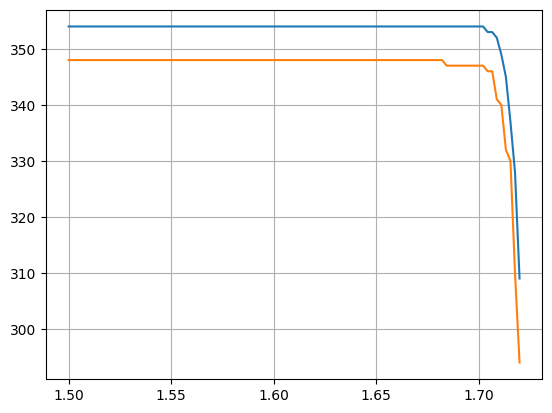

In [10]:
seuils = np.linspace(1.5, 1.72, 100)
comptage_gauche = []
comptage_droite = []

for s in seuils:
    Lg = []
    Ld = []
    for section in sections_gauche:
        Lg.append(compte(section,s))
    comptage_gauche.append(np.median(Lg))
    for section in sections_droite:
        Ld.append(compte(section,s))
    comptage_droite.append(np.median(Ld))
    
plt.figure()
plt.grid()
plt.plot(seuils, comptage_gauche)
plt.plot(seuils, comptage_droite)

Le résultat est stable pour les seuils de tolérance plus petits que 1.65